In [94]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [95]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 문제

feature: pclass, sex, fare
label: survived
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.
5~ 8 .titanic 통계값을 구하시요(문제는 자율)

In [96]:
titanic1 = pd.get_dummies(titanic)

In [97]:
x_data = titanic1[['pclass','sex_female','sex_male','fare']]
y_data = titanic['survived']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)
model=make_pipeline(StandardScaler(),LogisticRegression() )
model.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### 1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 

In [99]:
p=model.predict([[1,1,0,32]])
p # survived = 1 

array([1], dtype=int64)

### 2. train, test, f1 score 를 구하시요

In [100]:
print('train: ', model.score(x_train, y_train))
print('test: ', model.score(x_test, y_test))

train:  0.7893258426966292
test:  0.776536312849162


In [101]:
y_test_pred = model.predict(x_test)
ps = precision_score(y_test, y_test_pred)
rs = recall_score(y_test, y_test_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_test, y_test_pred))
print('recall : ', recall_score(y_test, y_test_pred))
print('f1 score : ', f1score)

precision :  0.7538461538461538
recall :  0.6712328767123288
f1 score :  0.7101449275362318


### 3. confusion matrix 를 구하고 heatmap 을 그리시요.

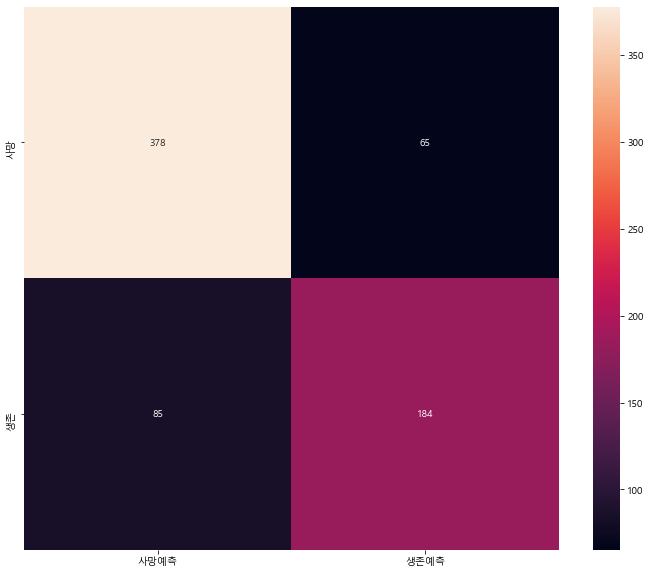

In [102]:
cm_train = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True,fmt='d',yticklabels = ['사망', '생존'], xticklabels = ['사망예측', '생존예측'])
plt.show()

### 4. roc curve 를 그리시요.

In [103]:
p = model.predict_proba (x_test)
p

array([[0.08894919, 0.91105081],
       [0.90923917, 0.09076083],
       [0.20878765, 0.79121235],
       [0.41519249, 0.58480751],
       [0.20787783, 0.79212217],
       [0.90924038, 0.09075962],
       [0.78737235, 0.21262765],
       [0.088181  , 0.911819  ],
       [0.57459024, 0.42540976],
       [0.4145665 , 0.5854335 ],
       [0.90923917, 0.09076083],
       [0.41521056, 0.58478944],
       [0.57718296, 0.42281704],
       [0.78813364, 0.21186636],
       [0.41522545, 0.58477455],
       [0.57934506, 0.42065494],
       [0.90865932, 0.09134068],
       [0.90900176, 0.09099824],
       [0.90923917, 0.09076083],
       [0.20831072, 0.79168928],
       [0.90923833, 0.09076167],
       [0.90904943, 0.09095057],
       [0.08828232, 0.91171768],
       [0.78457375, 0.21542625],
       [0.4146554 , 0.5853446 ],
       [0.90921701, 0.09078299],
       [0.08246263, 0.91753737],
       [0.20864304, 0.79135696],
       [0.78827981, 0.21172019],
       [0.08544757, 0.91455243],
       [0.

In [104]:
df = pd.DataFrame([y_test])
df = df.T
df # df['proba'] = p[:,1]

,survived
862,1
223,0
84,1
680,0
535,1
...,...
796,1
815,0
629,0
421,0


In [105]:
df['proba'] = p[:,1]
df

,survived,proba
862,1,0.911051
223,0,0.090761
84,1,0.791212
680,0,0.584808
535,1,0.792122
...,...,...
796,1,0.911051
815,0,0.418390
629,0,0.090756
421,0,0.090756


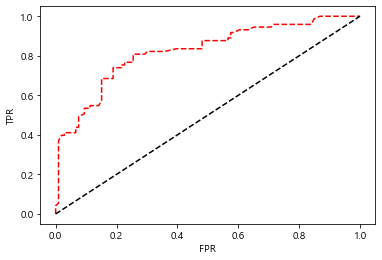

In [106]:
# roc_curve( y_test, p[:,1])
fpr, tpr, thresholds = roc_curve( y_test, df['proba'].values )
# print(fpr)
# print(tpr)
# print(thresholds)
plt.plot(fpr, tpr, 'r--',)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### 5 ~ 8 번 타이타닉 통계값  문제

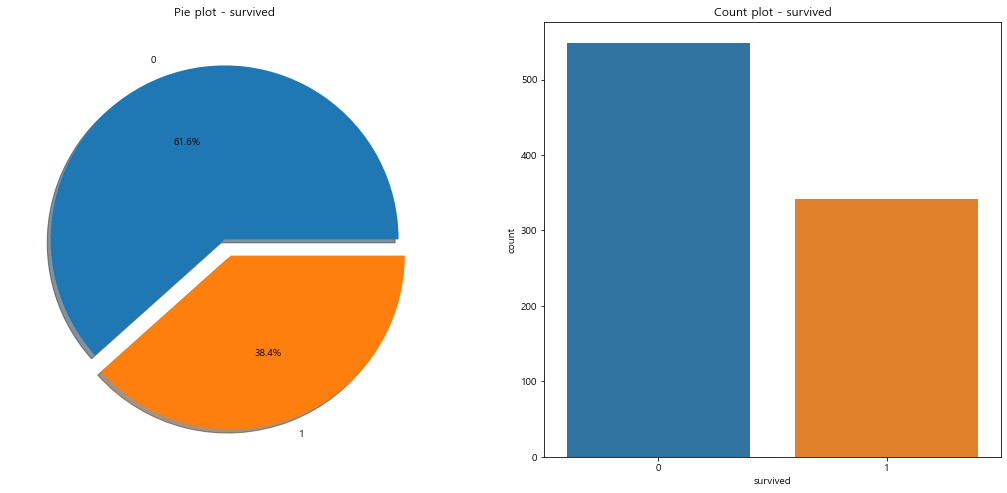

In [107]:
# 생존 사망 비율
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

<AxesSubplot:xlabel='pclass'>

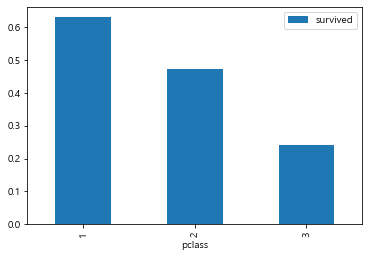

In [109]:
# 클래스별 생존비율

titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar()

In [110]:
# class에 따른 fare 통계값 구하기
df8 = titanic[['class','fare']]
df8.groupby('class', as_index=False).agg(['min','max','mean'])  

fare                     
        min       max       mean
class                           
First   0.0  512.3292  84.154687
Second  0.0   73.5000  20.662183
Third   0.0   69.5500  13.675550

<AxesSubplot:xlabel='alone', ylabel='count'>

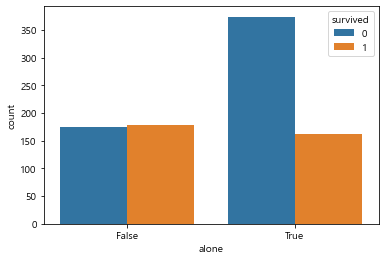

In [111]:
# 혼자 탑승(alone)한 여부와 생존 비율의 관계를 시각화하시오.
sns.countplot(x='alone',hue = 'survived', data = titanic)